# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных
- Будем работать с датасетом, содержащим информацию о выданных визах H1B

In [17]:
data = pd.read_csv('C:\\MGTU\\6 semestr\\TMO\\h1b_kaggle.csv', sep=",")

In [21]:
data.shape

(3002458, 11)

In [22]:
data.dtypes

Unnamed: 0              int64
CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
lon                   float64
lat                   float64
dtype: object

In [23]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

data.head()

In [25]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 3002458


# Обработка пропусков в данных
- Удаление или заполнение нулями

In [26]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((3002458, 11), (3002458, 2))

In [27]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((3002458, 11), (2877765, 11))

In [111]:
data_new_3 = data.fillna(0)
data_new_3.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


# "Внедрение значений" - импьютация (imputation)
- Обработка пропусков в числовых данных

In [29]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка PREVAILING_WAGE. Тип данных float64. Количество пустых значений 85, 0.0%.
Колонка YEAR. Тип данных float64. Количество пустых значений 13, 0.0%.
Колонка lon. Тип данных float64. Количество пустых значений 107242, 3.57%.
Колонка lat. Тип данных float64. Количество пустых значений 107242, 3.57%.


In [30]:
data_num = data[num_cols]
data_num

,PREVAILING_WAGE,YEAR,lon,lat
0,36067.0,2016.0,-83.743038,42.280826
1,242674.0,2016.0,-96.698886,33.019843
2,193066.0,2016.0,-74.077642,40.728158
3,220314.0,2016.0,-104.990251,39.739236
4,157518.4,2016.0,-90.199404,38.627003
...,...,...,...,...
3002453,NaN,NaN,-74.005941,40.712784
3002454,NaN,NaN,-97.134178,32.941236
3002455,NaN,NaN,-74.909890,40.636768
3002456,NaN,NaN,-76.780253,39.419550


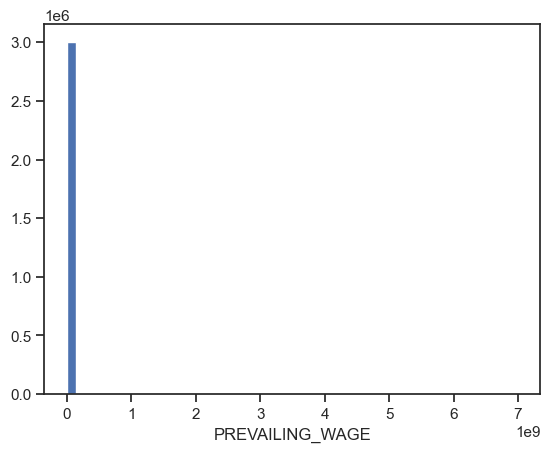

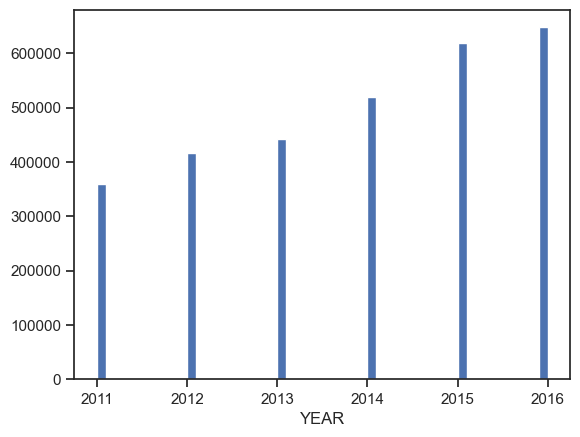

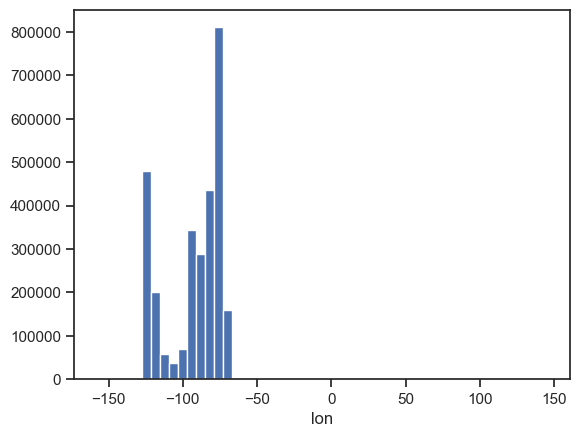

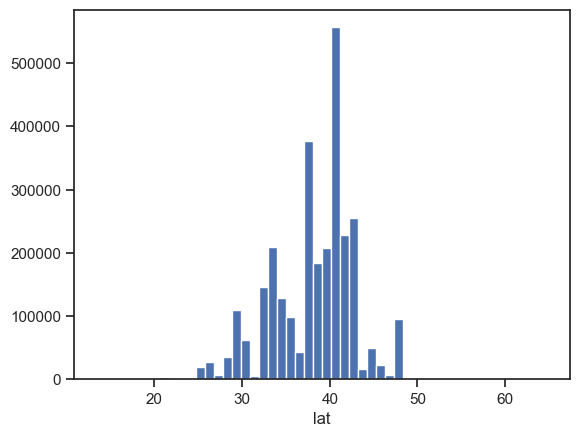

In [31]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [42]:
data_num_MasVnrArea = data_num[['lat']]
data_num_MasVnrArea.head()

,lat
0,42.280826
1,33.019843
2,40.728158
3,39.739236
4,38.627003


In [43]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [44]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [45]:
strategies=['mean', 'median', 'most_frequent']

In [46]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [47]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([38.16053785, 38.16053785, 38.16053785, ..., 38.16053785,
        38.16053785, 38.16053785]))

In [48]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([39.1031182, 39.1031182, 39.1031182, ..., 39.1031182, 39.1031182,
        39.1031182]))

In [49]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([40.7127837, 40.7127837, 40.7127837, ..., 40.7127837, 40.7127837,
        40.7127837]))

In [50]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [51]:
data[['lon']].describe()

,lon
count,2.895216e+06
mean,-9.213441e+01
std,1.965591e+01
min,-1.578583e+02
25%,-1.119261e+02
50%,-8.615862e+01
75%,-7.551381e+01
max,1.457298e+02


In [52]:
test_num_impute_col(data, 'lon', strategies[0])

('lon', 'mean', 107242, -92.13440680240892, -92.13440680240892)

In [53]:
test_num_impute_col(data, 'lon', strategies[1])

('lon', 'median', 107242, -86.1586156, -86.1586156)

In [54]:
test_num_impute_col(data, 'lon', strategies[2])

('lon', 'most_frequent', 107242, -74.0059413, -74.0059413)

- Обработка пропусков в категориальных данных

In [55]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка CASE_STATUS. Тип данных object. Количество пустых значений 13, 0.0%.
Колонка EMPLOYER_NAME. Тип данных object. Количество пустых значений 59, 0.0%.
Колонка SOC_NAME. Тип данных object. Количество пустых значений 17734, 0.59%.
Колонка JOB_TITLE. Тип данных object. Количество пустых значений 43, 0.0%.
Колонка FULL_TIME_POSITION. Тип данных object. Количество пустых значений 15, 0.0%.


In [59]:
cat_temp_data = data[['CASE_STATUS']]
cat_temp_data.head()

,CASE_STATUS
0,CERTIFIED-WITHDRAWN
1,CERTIFIED-WITHDRAWN
2,CERTIFIED-WITHDRAWN
3,CERTIFIED-WITHDRAWN
4,WITHDRAWN


In [60]:
cat_temp_data['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', nan],
      dtype=object)

In [62]:
cat_temp_data[cat_temp_data['CASE_STATUS'].isnull()].shape

(13, 1)

In [63]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['CERTIFIED-WITHDRAWN'],
       ['CERTIFIED-WITHDRAWN'],
       ['CERTIFIED-WITHDRAWN'],
       ...,
       ['CERTIFIED'],
       ['CERTIFIED'],
       ['CERTIFIED']], dtype=object)

In [64]:
np.unique(data_imp2)

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'REJECTED',
       'WITHDRAWN'], dtype=object)

In [65]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['CERTIFIED-WITHDRAWN'],
       ['CERTIFIED-WITHDRAWN'],
       ['CERTIFIED-WITHDRAWN'],
       ...,
       ['NA'],
       ['NA'],
       ['NA']], dtype=object)

In [66]:
np.unique(data_imp3)

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'INVALIDATED', 'NA',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'REJECTED',
       'WITHDRAWN'], dtype=object)

In [67]:
data_imp3[data_imp3=='NA'].size

13

- Преобразование категориальных признаков в числовые

In [68]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,CERTIFIED-WITHDRAWN
1,CERTIFIED-WITHDRAWN
2,CERTIFIED-WITHDRAWN
3,CERTIFIED-WITHDRAWN
4,WITHDRAWN
...,...
3002453,CERTIFIED
3002454,CERTIFIED
3002455,CERTIFIED
3002456,CERTIFIED


# Кодирование категорий целочисленными значениями (label encoding)

- Использование LabelEncoder

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
cat_enc['c1'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

In [71]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [72]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'REJECTED',
       'WITHDRAWN'], dtype=object)

In [73]:
cat_enc_le

array([1, 1, 1, ..., 0, 0, 0])

In [74]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6])

In [77]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3, 4, 5, 6])

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'REJECTED',
       'WITHDRAWN'], dtype=object)

- Использование OrdinalEncoder

In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
data_oe = data[['EMPLOYER_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION']]
data_oe.head()

,EMPLOYER_NAME,JOB_TITLE,FULL_TIME_POSITION
0,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,N
1,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,Y
2,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,Y
3,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",Y
4,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,Y


In [80]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['UNIVERSITY OF MICHIGAN', 'POSTDOCTORAL RESEARCH FELLOW', 'N'],
       ['GOODMAN NETWORKS, INC.', 'CHIEF OPERATING OFFICER', 'Y'],
       ['PORTS AMERICA GROUP, INC.', 'CHIEF PROCESS OFFICER', 'Y'],
       ...,
       ['NA', 'NA', 'NA'],
       ['NA', 'NA', 'NA'],
       ['NA', 'NA', 'NA']], dtype=object)

In [81]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[2.19673e+05, 1.63538e+05, 0.00000e+00],
       [8.60970e+04, 4.32620e+04, 2.00000e+00],
       [1.63481e+05, 4.33370e+04, 2.00000e+00],
       ...,
       [1.41740e+05, 1.47991e+05, 1.00000e+00],
       [1.41740e+05, 1.47991e+05, 1.00000e+00],
       [1.41740e+05, 1.47991e+05, 1.00000e+00]])

In [82]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 2.36011e+05,
       2.36012e+05, 2.36013e+05])

In [83]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 2.87547e+05,
       2.87548e+05, 2.87549e+05])

In [84]:
oe.categories_

[array(['"EXCELLENT COMPUTING DISTRIBUTORS INC"',
        '"I HAVE A DREAM" FOUNDATION', '"K" LINE AMERICA', ...,
        'ÉTUDES LLC', 'ÉTUDES, LLC', 'ËNIMAI, INC.'], dtype=object),
 array(['"BUSINESS SYSTEM ANALYST', '"SALES MANAGER',
        '"TEST" SENIOR SCIENTIST', ..., '\xa0TEAM LEAD - US',
        '\xa0TECHNOLOGY ARCHITECT - US', '\xa0TEST ANALYST - US'],
       dtype=object),
 array(['N', 'NA', 'Y'], dtype=object)]

In [85]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['UNIVERSITY OF MICHIGAN', 'POSTDOCTORAL RESEARCH FELLOW', 'N'],
       ['GOODMAN NETWORKS, INC.', 'CHIEF OPERATING OFFICER', 'Y'],
       ['PORTS AMERICA GROUP, INC.', 'CHIEF PROCESS OFFICER', 'Y'],
       ...,
       ['NA', 'NA', 'NA'],
       ['NA', 'NA', 'NA'],
       ['NA', 'NA', 'NA']], dtype=object)

# Кодирование шкал порядка

In [86]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [87]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [88]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [89]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


# Кодирование категорий наборами бинарных значений - one-hot encoding

In [90]:
from sklearn.preprocessing import OneHotEncoder

In [91]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [92]:
cat_enc.shape

(3002458, 1)

In [93]:
cat_enc_ohe.shape

(3002458, 7)

In [94]:
cat_enc_ohe

<3002458x7 sparse matrix of type '<class 'numpy.float64'>'
	with 3002458 stored elements in Compressed Sparse Row format>

In [95]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.]])

In [96]:
cat_enc.head(10)

,c1
0,CERTIFIED-WITHDRAWN
1,CERTIFIED-WITHDRAWN
2,CERTIFIED-WITHDRAWN
3,CERTIFIED-WITHDRAWN
4,WITHDRAWN
5,CERTIFIED-WITHDRAWN
6,CERTIFIED-WITHDRAWN
7,CERTIFIED-WITHDRAWN
8,CERTIFIED-WITHDRAWN
9,WITHDRAWN


# Pandas get_dummies - быстрый вариант one-hot кодирования

In [97]:
pd.get_dummies(cat_enc).head()

,c1_CERTIFIED,c1_CERTIFIED-WITHDRAWN,c1_DENIED,c1_INVALIDATED,c1_PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,c1_REJECTED,c1_WITHDRAWN
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,False,True


In [100]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,CASE_STATUS_CERTIFIED,CASE_STATUS_CERTIFIED-WITHDRAWN,CASE_STATUS_DENIED,CASE_STATUS_INVALIDATED,CASE_STATUS_PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,CASE_STATUS_REJECTED,CASE_STATUS_WITHDRAWN,CASE_STATUS_nan
0,False,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False


# Масштабирование данных

- MinMax масштабирование

In [101]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [106]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['lat']])

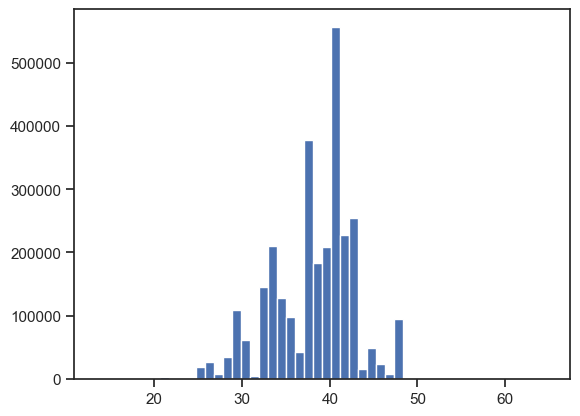

In [107]:
plt.hist(data['lat'], 50)
plt.show()

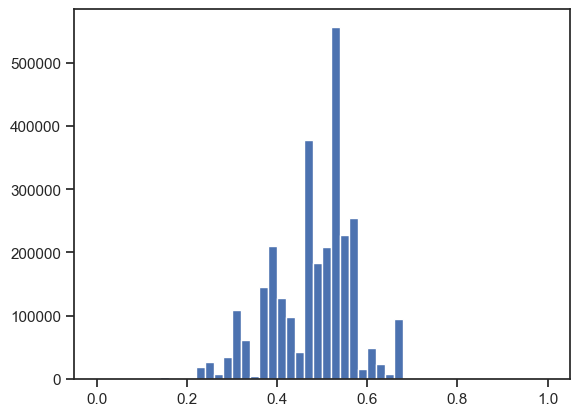

In [108]:
plt.hist(sc1_data, 50)
plt.show()

- Масштабирование данных на основе Z-оценки - StandardScaler

In [109]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['lat']])

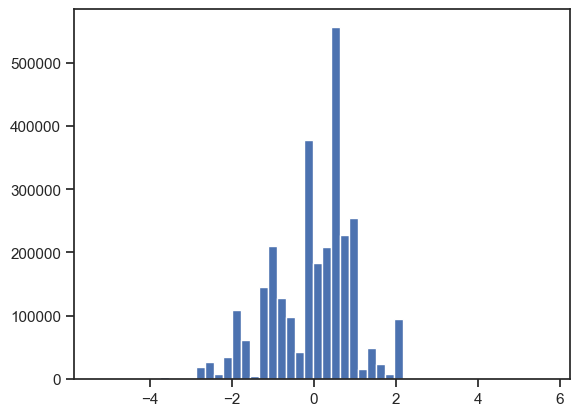

In [110]:
plt.hist(sc2_data, 50)
plt.show()